In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 20
plt.figure(figsize = (40, 20))

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

In [4]:
df_acc = pd.DataFrame()

df_acc['Model'] = ['CatBoost', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']

for method in ['mean', 'median', 'knn']:
    df_tmp = pd.read_csv('./FINAL/acc_' + method + '.csv')

    df_acc[method + '_30'] = df_tmp['30 Features'].tolist()
    df_acc[method + '_all'] = df_tmp['All Features'].tolist()

    df_tmp = pd.read_csv('./FINAL/acc_' + method + '_cv.csv')

    df_acc[method + '_cv_30'] = df_tmp['30 Features'].tolist()
    df_acc[method + '_cv_all'] = df_tmp['All Features'].tolist()

In [5]:
df_acc

,Model,mean_30,mean_all,mean_cv_30,mean_cv_all,median_30,median_all,median_cv_30,median_cv_all,knn_30,knn_all,knn_cv_30,knn_cv_all
0,CatBoost,0.824159,0.825724,0.842172,0.853421,0.829637,0.828072,0.843779,0.856638,0.811114,0.821550,0.828454,0.840350
1,Gradient Boosting,0.815288,0.822854,0.817531,0.827493,0.817897,0.819723,0.820958,0.823529,0.810853,0.818158,0.816243,0.825030
2,Logistic Regression,0.797548,0.696061,0.796313,0.706845,0.791025,0.693973,0.799528,0.711666,0.780068,0.690843,0.772097,0.700416
3,Random Forest,0.829898,0.825724,0.850745,0.845924,0.832246,0.830420,0.847959,0.847637,0.815027,0.816071,0.833814,0.827816
4,SVM,0.751370,0.644404,0.762881,0.642880,0.747978,0.644404,0.760097,0.642880,0.747195,0.644665,0.758060,0.642880
5,XGBoost,0.819202,0.827550,0.832101,0.844420,0.813984,0.818158,0.825350,0.845066,0.804070,0.815288,0.818705,0.834459


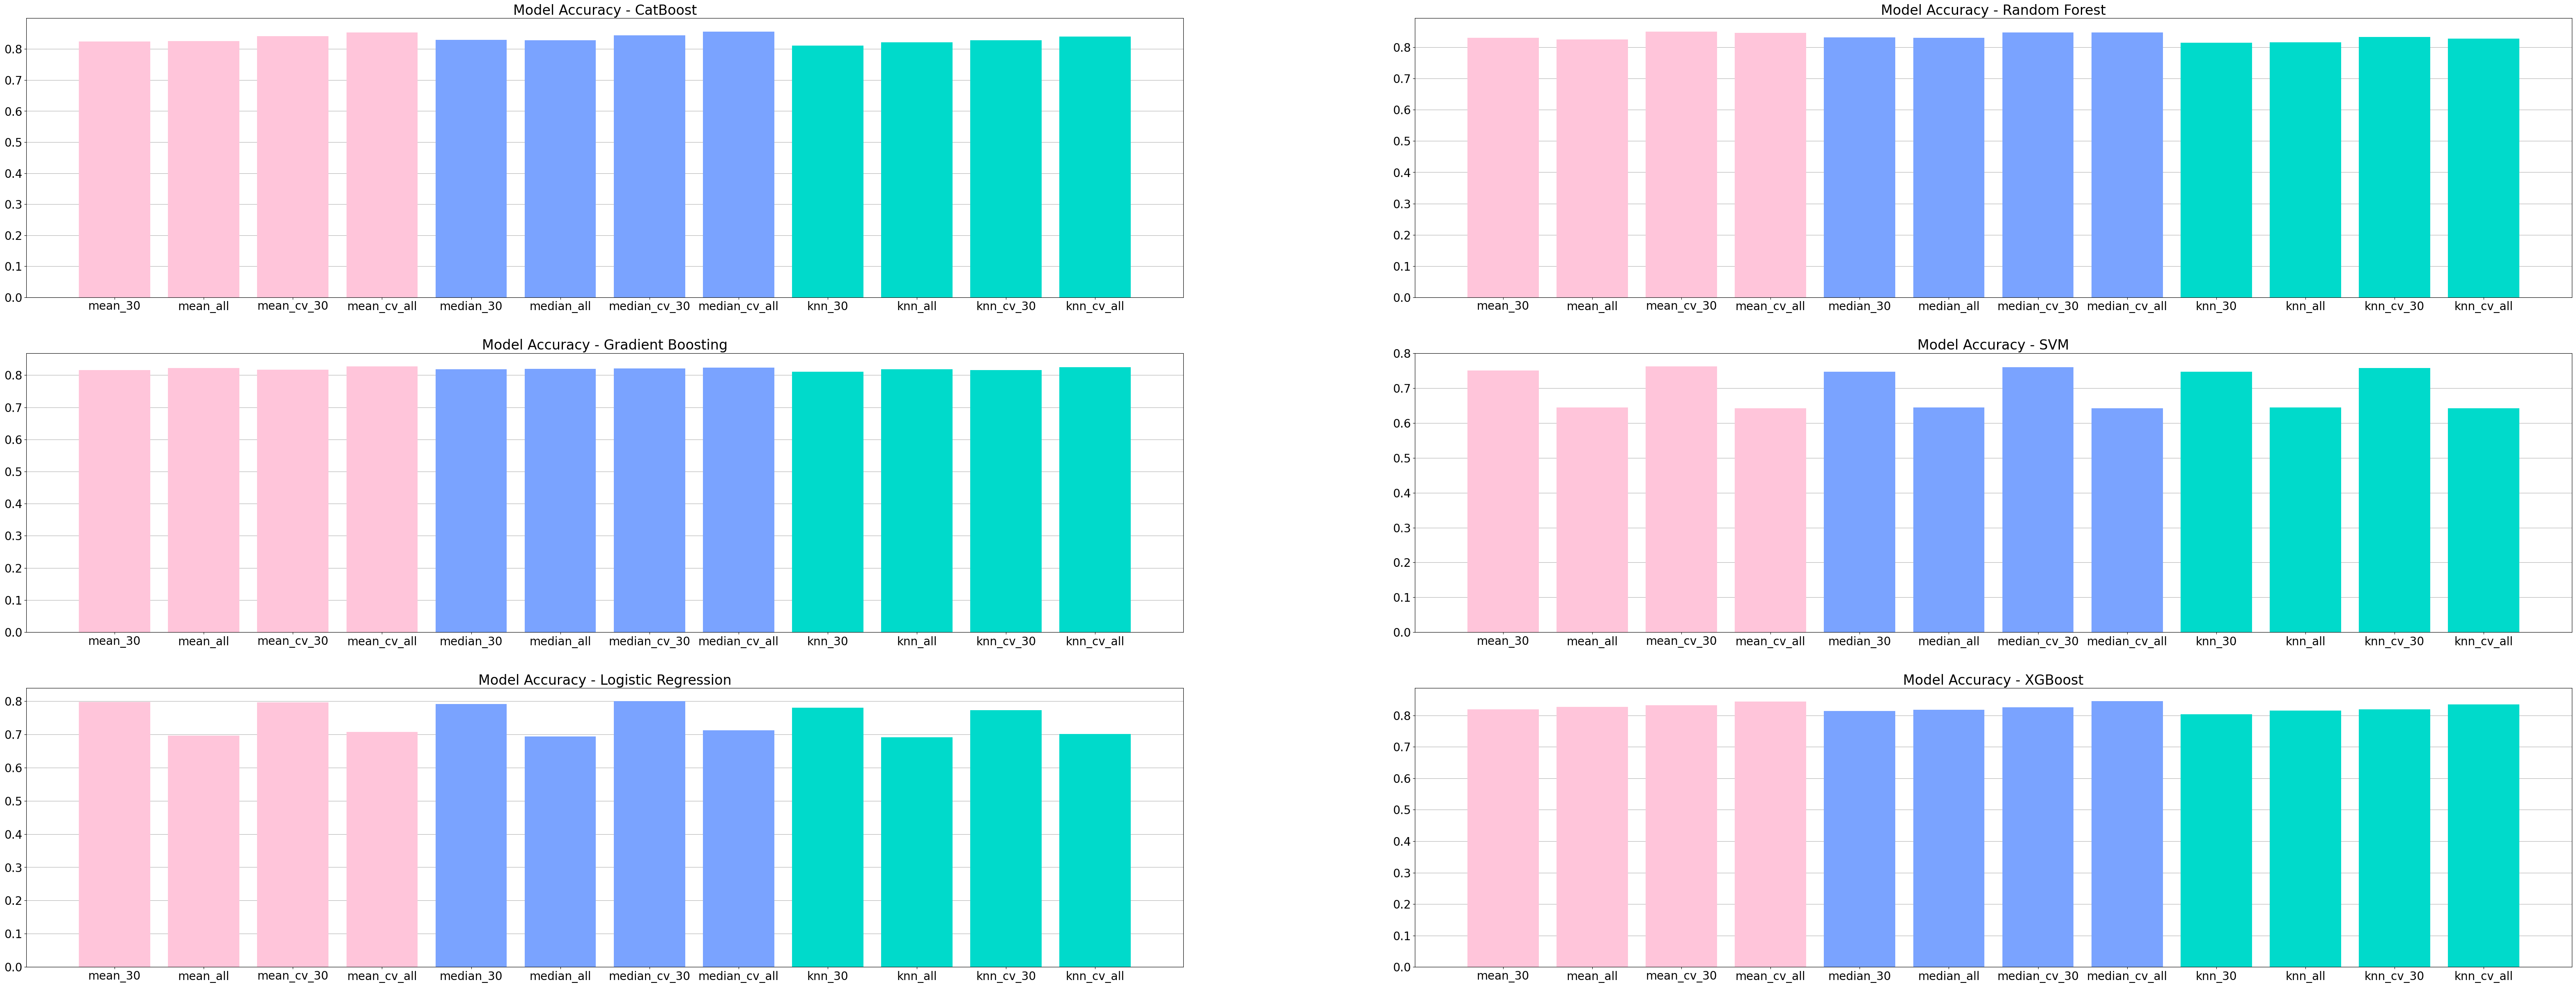

In [6]:
f, ax = plt.subplots(3, 2, figsize = (80, 30))
columns = df_acc.columns[1:]

colors = []
for col in columns:
    if col[:3] == 'mea':
        colors.append('#ffc5da')
    elif col[:3] == 'med':
        colors.append('#7aa3ff')
    else:
        colors.append('#00dacb')

for i in range(len(df_acc['Model'].tolist())):
    max_acc = max(df_acc.iloc[i, 1:])

    ax[i % 3][i // 3].bar(columns, df_acc.iloc[i, 1:], color = colors)

    ax[i % 3][i // 3].set_title("Model Accuracy - " + df_acc.iloc[i, 0])
    ax[i % 3][i // 3].grid(axis = 'y')
    ax[i % 3][i // 3].set_axisbelow(True)

plt.show()